### Data Exploration and other examples

In [1]:
import os
os.chdir('..')

In [2]:
# Import all the packages we need to generate recommendations
import pandas as pd
import wwc_recsys.utils as utils
import wwc_recsys.recommenders as recommenders
import wwc_recsys.similarity as similarity

In [3]:
# Get the dataset folder. If the dataset is not downloaded, it downloads it and unzips it
# It merges my_ratings_file with the dataset
datasets_folder = os.getcwd()+'/data/'
dataset_url = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
my_ratings_file = 'ratings_humberto.csv'
[ratings, my_customer_number] = utils.merge_datasets(datasets_folder, dataset_url, my_ratings_file)

In [4]:
# transform the data to get similar movies 
[ratings, my_customer_number] = utils.merge_datasets(datasets_folder, dataset_url, my_ratings_file)
ratings_matrix = ratings.pivot_table(index='customer', columns='movie', values='rating', fill_value=0)
ratings_matrix = ratings_matrix.transpose()
movie_list = pd.DataFrame(ratings_matrix.index)

In [6]:
# my ratings
ratings.ix[ratings.customer == my_customer_number]

,customer,movie,rating
20853,669,Annie Hall (1977),3.0
43746,669,"Beach, The (2000)",3.0
47953,669,The Queen (2006),2.0
67295,669,"Perks of Being a Wallflower, The (2012)",5.0
78656,669,Hard Candy (2005),4.0
93562,669,Dogtown and Z-Boyz (2001),4.0
96313,669,Blue Is the Warmest Color (La vie d'Adèle) (2013),4.5
101256,669,Amour (2012),5.0
102152,669,"Single Man, A (2009)",5.0
102231,669,"Skin I Live In, The (La piel que habito) (2011)",4.0


4.0    28884
3.0    21731
5.0    14859
3.5    12237
4.5     8189
2.0     7944
2.5     5484
1.0     3258
1.5     1567
0.5     1198
Name: rating, dtype: int64

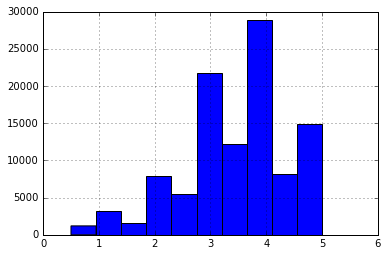

In [14]:
# ratings distribution 

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
ratings['rating'].hist()
ratings.rating.value_counts()

In [18]:
# number of users, items and ratings
n_users= len(ratings['customer'].unique())
n_items= len(ratings['movie'].unique())
n_ratings = ratings.shape[0]


In [19]:
print('number of users',n_users)
print('number of items', n_items)
print('number of ratings', n_ratings)

number of users 669
number of items 10323
number of ratings 105351


In [20]:
# get recommendations for a single user  (with default parameters)
# filter by threshold 
help(recommenders.recommend_iknn)

Help on function recommend_iknn in module wwc_recsys.recommenders:

recommend_iknn(ratings, target_customer, K=10, N=10, similarity_metric='pearson')
    Give list of recommendations to a particular user
    :param target_customer: user for which we want to compute recommendations
    :param ratings: a dataframe with ratings
    :param K: how many neigbhours to use in UK-NN algorithm
    :param N: how many recommendations to output in top-N recommendations
    :param similarity_metric: which similarity metric to use
    :return: a dataframe with a list of recommendations and the predicted rating



In [26]:
recommendations = recommenders.recommend_iknn(ratings, my_customer_number, K=2, N=100, similarity_metric='pearson')

In [27]:
recommendations = recommendations.ix[recommendations.rating >= 4.5]
recommendations 

,rating,movie
0,5.0,"Single Man, A (2009)"
1,5.0,Shaun the Sheep Movie (2015)
2,5.0,Melancholia (2011)
3,5.0,Daddy Day Care (2003)
4,5.0,Barney's Version (2010)
5,4.5,Submarine (2010)
6,4.5,From One Second to the Next (2013)
7,4.5,Crossing Over (2009)
8,4.5,42 (2013)


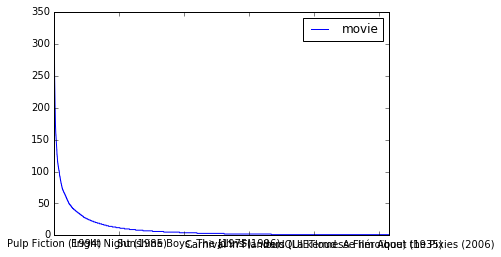

In [39]:
# movie popularity distribution
popularity = pd.DataFrame(ratings['movie'].value_counts())
popularity.sort_values(by='movie', ascending=False)
popularity.plot()

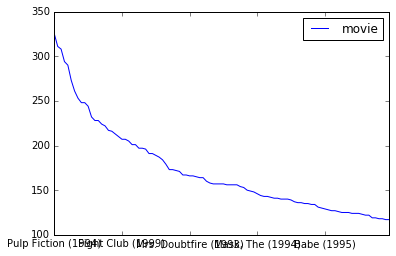

In [40]:
popularity.ix[0:100].plot()